<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_2_Nice_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.

In [ ]:
import pandas as pd
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")

In [ ]:
#to numpy array, y(x)
x,y = df[['temperatura']].values, df[['classification']].values

In [ ]:
#convert labels to number
from sklearn.preprocessing import LabelEncoder
print(y)
le = LabelEncoder()
y = le.fit_transform(y.ravel())#ravel for 1 dimension array
print(y)

[['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]
[3 2 3 3 0 1]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y) #train with data to find best coefficients

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from numpy import linspace
#100 temperatures between -15 and 45
x_test = linspace(start=-15.,stop=45.,num=100).reshape(-1,1)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#back to original labels
y_pred=le.inverse_transform(y_pred)
y_pred

array(['frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'confortavel',
       'confortavel', 'confortavel', 'confortavel', 'confortavel',
       'quente', 'quente', 'quente', 'quente', 'quente', 'quente',
       'quente', 'quente', 'quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito que

In [ ]:
output = {'temp':x_test.ravel(),
          'class':y_pred.ravel()}
output = pd.DataFrame(output)

In [ ]:
output

,temp,class
0,-15.000000,frio
1,-14.393939,frio
2,-13.787879,frio
3,-13.181818,frio
4,-12.575758,frio
...,...,...
95,42.575758,muito quente
96,43.181818,muito quente
97,43.787879,muito quente
98,44.393939,muito quente


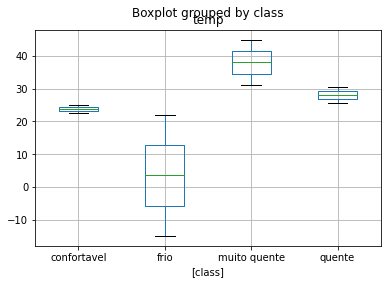

In [ ]:
output.boxplot(by='class')

In [ ]:
def classify_temp(temp:float):
  import numpy as np
  try:
    temp = float(temp)
  except:
    print('Invalid Input')
  temp = np.array(temp).reshape(-1,1)
  clasif_temp = clf.predict(temp)
  clasif_temp = le.inverse_transform(clasif_temp)
  return clasif_temp[0]

classify_temp(25)

'confortavel'